In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import pi
import matplotlib.pyplot as plt 
import re
import time
from datetime import datetime
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
from spotipy.oauth2 import SpotifyOAuth

cid = '5d9494efb79d4abaabc13e9778431f49'
secret = '4d23d535c7fe4e9cadd241ddf58df15e'
scope = "user-read-currently-playing"

client_credentials_manager = SpotifyClientCredentials(
    client_id=cid, client_secret=secret)

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=cid, client_secret=secret, redirect_uri="http://localhost:9000"))

# sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, scope=scope)
sp.user('pratham')


ConnectionError: HTTPSConnectionPool(host='accounts.spotify.com', port=443): Max retries exceeded with url: /api/token (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001878BDE9930>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [3]:
FeatureDF = pd.read_csv('./data/features/features.csv')
TracksDF = pd.read_csv('./data/tracks/tracks.csv')

In [4]:
TracksDF.head()

,playlist_uri,album,album_uri,artist,artist_uri,disc_number,duration_ms,name,popularity,explicit,uri,link
0,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,153693,All I Need,55,False,spotify:track:47hXMyQDGW8sA1NGqmFL7h,https://api.spotify.com/v1/tracks/47hXMyQDGW8s...
1,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,204373,Hollow,40,False,spotify:track:1y7FoHfVtbZV6mONGJgU7j,https://api.spotify.com/v1/tracks/1y7FoHfVtbZV...
2,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,193733,Favorite Peeps,44,False,spotify:track:0SHa9XHwYYB1UUmgbgHuhQ,https://api.spotify.com/v1/tracks/0SHa9XHwYYB1...
3,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,163653,Co2,53,False,spotify:track:3hB9lDLyAClYVZivMMl20N,https://api.spotify.com/v1/tracks/3hB9lDLyAClY...
4,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,184413,Face,39,False,spotify:track:0HuS5vFQd06cXV54I0twkV,https://api.spotify.com/v1/tracks/0HuS5vFQd06c...


In [5]:
FeatureDF.head()

,playlist_uri,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,uri
0,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,153693,6,1,4,0.771,0.786,0.356,0.6940,0.100,-11.432,0.0462,0.5190,116.023,spotify:track:47hXMyQDGW8sA1NGqmFL7h
1,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,204373,11,1,4,0.845,0.348,0.310,0.0569,0.111,-13.122,0.0413,0.0474,114.812,spotify:track:1y7FoHfVtbZV6mONGJgU7j
2,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,193733,7,1,4,0.767,0.611,0.525,0.7990,0.112,-9.683,0.0354,0.2990,113.946,spotify:track:0SHa9XHwYYB1UUmgbgHuhQ
3,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,163653,1,1,4,0.663,0.533,0.678,0.0000,0.145,-5.244,0.0256,0.6830,80.960,spotify:track:3hB9lDLyAClYVZivMMl20N
4,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,184413,7,1,4,0.920,0.481,0.669,0.0219,0.139,-13.329,0.4550,0.3510,128.219,spotify:track:0HuS5vFQd06cXV54I0twkV


In [6]:
categories = ['danceability',
              'energy',
              'speechiness',
              'acousticness',
              'liveness',
              'valence']


In [16]:
FeatureDF

,playlist_uri,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,uri
0,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,153693,6,1,4,0.7710,0.786,0.3560,0.694000,0.1000,-11.432,0.0462,0.5190,116.023,spotify:track:47hXMyQDGW8sA1NGqmFL7h
1,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,204373,11,1,4,0.8450,0.348,0.3100,0.056900,0.1110,-13.122,0.0413,0.0474,114.812,spotify:track:1y7FoHfVtbZV6mONGJgU7j
2,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,193733,7,1,4,0.7670,0.611,0.5250,0.799000,0.1120,-9.683,0.0354,0.2990,113.946,spotify:track:0SHa9XHwYYB1UUmgbgHuhQ
3,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,163653,1,1,4,0.6630,0.533,0.6780,0.000000,0.1450,-5.244,0.0256,0.6830,80.960,spotify:track:3hB9lDLyAClYVZivMMl20N
4,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,184413,7,1,4,0.9200,0.481,0.6690,0.021900,0.1390,-13.329,0.4550,0.3510,128.219,spotify:track:0HuS5vFQd06cXV54I0twkV
5,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,180013,0,1,4,0.8380,0.360,0.2470,0.004540,0.1040,-9.415,0.0396,0.2790,77.225,spotify:track:3XWRc74od1pT7MUkGiJmoW
6,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,167587,5,1,4,0.7680,0.358,0.5800,0.005800,0.1270,-9.924,0.0450,0.3520,98.853,spotify:track:1kJvdhrr9MHOZ1e1PhTXTG
7,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,219907,5,0,4,0.7330,0.693,0.4590,0.059300,0.1200,-12.451,0.0407,0.3500,81.024,spotify:track:29YXX6TCgc7d5jz3BYF7Gc
8,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,187733,0,1,4,0.6620,0.661,0.4810,0.079100,0.0789,-10.962,0.0294,0.1540,119.974,spotify:track:7pgIbZ3tWdXLUAlofe3r2i
9,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,219573,7,1,4,0.5970,0.606,0.4880,0.098200,0.1840,-7.339,0.0255,0.4680,81.019,spotify:track:39lOHITmszIVH9WF4Jpbum


<AxesSubplot: xlabel='key', ylabel='Count'>

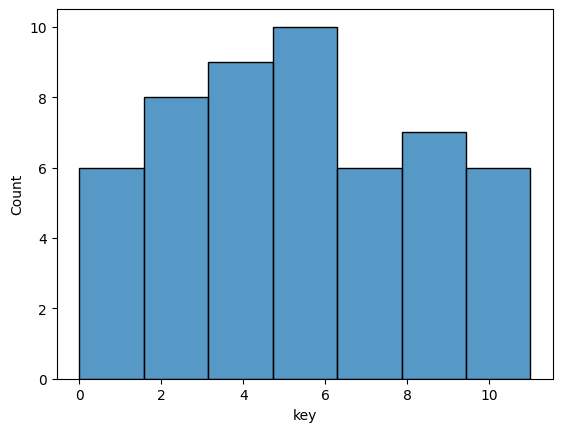

In [17]:
sns.histplot(FeatureDF,x='key')

0: Minor
1: Major



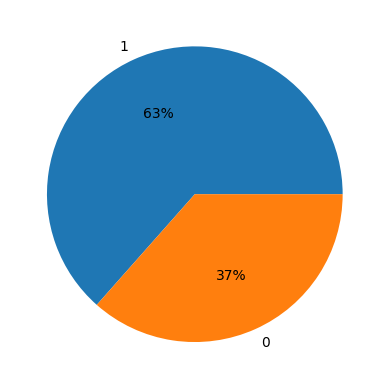

In [11]:
mode = list(FeatureDF['mode'].value_counts().index)
size = list(FeatureDF['mode'].value_counts())
fig = plt.pie(size, labels=mode,autopct='%.0f%%')

Text(0.5, 1.0, 'valence')

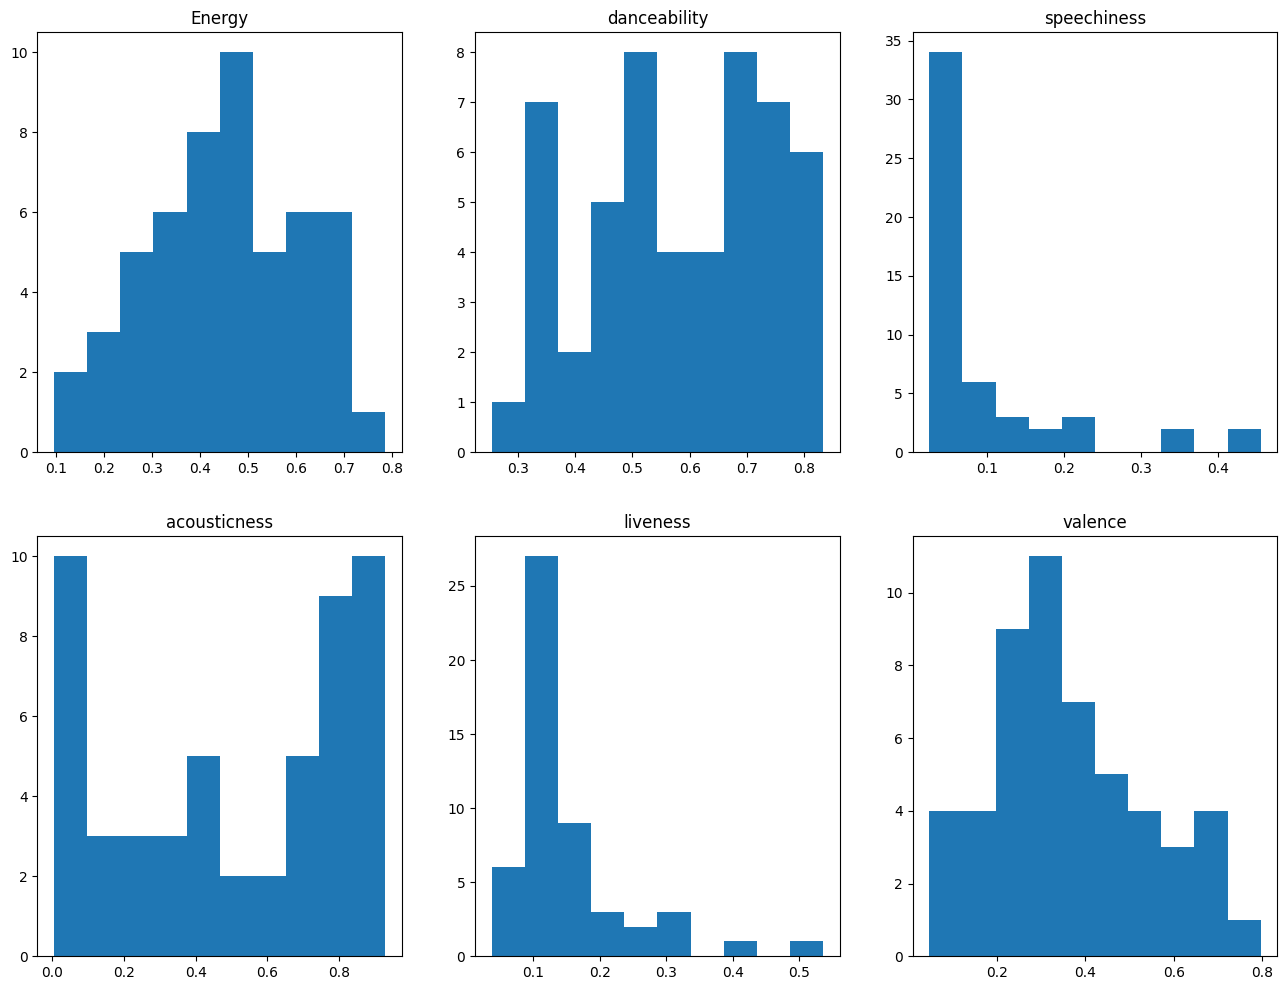

In [21]:
plt.figure(figsize=(16,12))
plt.subplot(2,3,1)
plt.hist(FeatureDF['energy'])
plt.title('Energy')
plt.subplot(2,3,2)
plt.hist(FeatureDF['danceability'])
plt.title('danceability')
plt.subplot(2,3,3)
plt.hist(FeatureDF['speechiness'])
plt.title('speechiness')
plt.subplot(2,3,4)
plt.hist(FeatureDF['acousticness'])
plt.title('acousticness')
plt.subplot(2,3,5)
plt.hist(FeatureDF['liveness'])
plt.title('liveness')
plt.subplot(2,3,6)
plt.hist(FeatureDF['valence'])
plt.title('valence')

In [ ]:
fig = make_subplots(rows=3, cols=2,
                    subplot_titles = ['Energy', 'Danceability', 'Speechiness',
                                      'Acousticness', 'Liveness', 'Valence'])
fig.add_trace(sns.hist(x=, name = 'Energy'), row=1, col=1)
fig.add_trace(sns.hist(x=FeatureDF['danceability'], name = 'Danceability'), row=1, col=2)
fig.add_trace(sns.hist(x=FeatureDF['speechiness'], name = 'Speechiness'), row=2, col=1)
fig.add_trace(sns.hist(x=FeatureDF['acousticness'], name = 'Acousticness'), row=2, col=2)
fig.add_trace(sns.hist(x=FeatureDF['liveness'], name = 'Liveness'), row=3, col=1)
fig.add_trace(sns.hist(x=FeatureDF['valence'], name = 'Valence'), row=3, col=2)
fig.update_layout(title = "Distribution of Spotify metrics of Playlist")
fig.show()

In [25]:
TracksDF.head()

,playlist_uri,album,album_uri,artist,artist_uri,disc_number,duration_ms,name,popularity,explicit,uri,link
0,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,153693,All I Need,55,False,spotify:track:47hXMyQDGW8sA1NGqmFL7h,https://api.spotify.com/v1/tracks/47hXMyQDGW8s...
1,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,204373,Hollow,40,False,spotify:track:1y7FoHfVtbZV6mONGJgU7j,https://api.spotify.com/v1/tracks/1y7FoHfVtbZV...
2,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,193733,Favorite Peeps,44,False,spotify:track:0SHa9XHwYYB1UUmgbgHuhQ,https://api.spotify.com/v1/tracks/0SHa9XHwYYB1...
3,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,163653,Co2,53,False,spotify:track:3hB9lDLyAClYVZivMMl20N,https://api.spotify.com/v1/tracks/3hB9lDLyAClY...
4,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,184413,Face,39,False,spotify:track:0HuS5vFQd06cXV54I0twkV,https://api.spotify.com/v1/tracks/0HuS5vFQd06c...


In [26]:
tracksDF2 = TracksDF.groupby(['name','album','uri'])['artist'].apply(','.join).reset_index()
# tracksDF2 = TracksDF.groupby('album').agg(lambda x: ''.join(set(x)))
# tracksDF2 = TracksDF.groupby(['album','name','uri'])['artist'].apply(','.join).reset_index()
tracksDF2

,name,album,uri,artist
0,0 to 100,No Name,spotify:track:7cVe3mYMIfhOlz1NXFWv70,Sidhu Moose Wala
1,051021,Scars & Screws,spotify:track:6D0RJju2TSMtZM1jsRc58S,"Shamoon Ismail,Talha Anjum"
2,All I Need,The Way That Lovers Do,spotify:track:47hXMyQDGW8sA1NGqmFL7h,Prateek Kuhad
3,All Night Long,Scars & Screws,spotify:track:308ngBPHBQa8HW4n0PBUKh,Shamoon Ismail
4,Ari Ari,Baaraat,spotify:track:3edqjLVQrRPLvt9FAYUAsT,"Ritviz,Nucleya"
5,Baaraat,Baaraat,spotify:track:0YLSjVxSb5FT1Bo8Tnxr8j,"Ritviz,Nucleya"
6,Bloodlust (feat. Mr. Capone-E),No Name,spotify:track:1O00WM9qGLUBA5gq2yw0WF,"Sidhu Moose Wala,Mr. Capone-E"
7,Bloom,The Way That Lovers Do,spotify:track:39lOHITmszIVH9WF4Jpbum,Prateek Kuhad
8,Chaunde Ne Pharna,Scars & Screws,spotify:track:18sA3ZuFnaYvinSyc1EZ0M,Shamoon Ismail
9,Co2,The Way That Lovers Do,spotify:track:3hB9lDLyAClYVZivMMl20N,Prateek Kuhad


In [27]:
DF1 = pd.merge(tracksDF2, FeatureDF, on="uri")
DF1.head()

,name,album,uri,artist,playlist_uri,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0 to 100,No Name,spotify:track:7cVe3mYMIfhOlz1NXFWv70,Sidhu Moose Wala,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,108493,8,1,4,0.1390,0.742,0.675,0.000000,0.1670,-6.551,0.0907,0.679,145.989
1,051021,Scars & Screws,spotify:track:6D0RJju2TSMtZM1jsRc58S,"Shamoon Ismail,Talha Anjum",spotify:playlist:7gKVccRxsOD0gKdUv63HoB,211544,2,1,4,0.0641,0.679,0.661,0.003270,0.0976,-8.928,0.1240,0.388,169.979
2,All I Need,The Way That Lovers Do,spotify:track:47hXMyQDGW8sA1NGqmFL7h,Prateek Kuhad,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,153693,6,1,4,0.7710,0.786,0.356,0.694000,0.1000,-11.432,0.0462,0.519,116.023
3,All Night Long,Scars & Screws,spotify:track:308ngBPHBQa8HW4n0PBUKh,Shamoon Ismail,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,190358,7,1,4,0.0554,0.756,0.436,0.031100,0.3090,-7.262,0.0457,0.228,101.933
4,Ari Ari,Baaraat,spotify:track:3edqjLVQrRPLvt9FAYUAsT,"Ritviz,Nucleya",spotify:playlist:7gKVccRxsOD0gKdUv63HoB,167472,0,1,4,0.0052,0.721,0.676,0.000003,0.2050,-6.534,0.0450,0.394,140.080


In [28]:
summaryDF = DF1.groupby("album").mean().reset_index()
summaryDF

C:\Users\prrra\AppData\Local\Temp\ipykernel_3848\2907560218.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,album,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,Baaraat,206257.000000,3.750000,0.500000,4.000000,0.169650,0.704250,0.597250,6.450000e-07,0.219900,-7.001750,0.069000,0.528500,126.792000
1,No Name,171279.200000,7.400000,0.600000,4.200000,0.156220,0.734000,0.654000,0.000000e+00,0.130060,-7.104400,0.180800,0.589400,131.594600
2,Scars & Screws,191376.916667,4.833333,0.583333,4.000000,0.166125,0.660167,0.434833,2.684601e-02,0.155367,-10.763917,0.151433,0.311500,115.787083
3,The Civil Wars,215217.750000,4.833333,0.666667,3.833333,0.740250,0.412083,0.319567,1.440484e-03,0.118400,-9.798500,0.033950,0.290917,131.534417
4,The Way That Lovers Do,179061.636364,5.272727,0.909091,4.000000,0.772091,0.543455,0.458818,1.653695e-01,0.120173,-10.351545,0.074764,0.341218,109.082909
5,rapunzel,197277.125000,5.875000,0.375000,4.000000,0.656625,0.595875,0.441250,4.528588e-03,0.210000,-10.232625,0.071925,0.321750,101.885875


AttributeError: PathCollection.set() got an unexpected keyword argument 'mode'

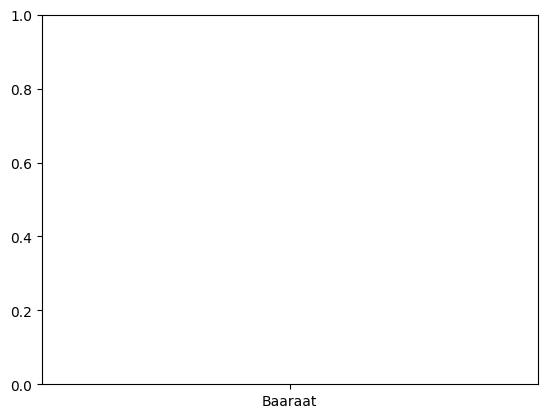

In [32]:
album = summaryDF['album']
fig = go.Figure()
fig.add_trace(sns.scatterplot(x=album, y=DF1['danceability'],
                         mode='lines+markers', name='Avg. Danceability',))
fig.add_trace(sns.scatterplot(x=album, y=DF1['energy'],
                         mode='lines+markers', name='Avg. Energy'))
fig.add_trace(sns.scatterplot(x=album, y=DF1['liveness'],
                         mode='lines+markers', name='Avg. Liveness'))
fig.add_trace(sns.scatterplot(x=album, y=DF1['valence'],
                         mode='lines+markers', name='Avg. Valence'))
fig.add_trace(sns.scatterplot(x=album, y=DF1['acousticness'],
                         mode='lines+markers', name='Avg. Acousticness'))
fig.add_trace(sns.scatterplot(x=album, y=DF1['speechiness'],
                         mode='lines+markers', name='Avg. Speechiness'))


In [ ]:
summaryDF['album']

0                   Baaraat
1                   No Name
2            Scars & Screws
3            The Civil Wars
4    The Way That Lovers Do
5                  rapunzel
Name: album, dtype: object

In [ ]:
fig = go.Figure()
album_names = summaryDF['album']
for a in album_names:
    temp = DF1[DF1["album"] == a]
    for index, row in temp.iterrows():
        fig.add_trace(sns.scatterplotpolar(
            r=row[categories],
            theta=categories,
            fill='toself',
            name=row["name"]
        ))
    fig.update_layout(title="Album: " + a)
    fig.show()
    fig = go.Figure()
